In [2]:
import pandas as pd
df = pd.read_csv('Airbnb_Open_Data.csv')


In [3]:
df

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,strict,Private room,2020.0,966.0,193,10.0,9.0,0.210000,4.0,6.0,286.0
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,moderate,Entire home/apt,2007.0,142.0,28,30.0,45.0,0.380000,4.0,2.0,228.0
2,1002403,78829239556,unconfirmed,Manhattan,Harlem,40.80902,-73.94190,flexible,Private room,2005.0,620.0,124,3.0,0.0,1.375408,5.0,1.0,352.0
3,1002755,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,moderate,Entire home/apt,2005.0,368.0,74,30.0,270.0,4.640000,4.0,1.0,322.0
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,moderate,Entire home/apt,2009.0,204.0,41,10.0,9.0,0.100000,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101549,57358028,56457739998,verified,Queens,East Elmhurst,40.76245,-73.87938,strict,Private room,2022.0,982.0,196,1.0,239.0,8.580000,2.0,2.0,361.0
101550,57358580,60176837202,verified,Queens,Edgemere,40.59380,-73.77373,moderate,Private room,2020.0,946.0,189,1.0,76.0,2.840000,1.0,1.0,324.0
101551,57359133,68411243647,verified,Manhattan,Upper West Side,40.79712,-73.96117,strict,Private room,2012.0,706.0,141,1.0,4.0,0.140000,4.0,1.0,0.0
101552,57359685,95625271612,verified,Manhattan,SoHo,40.72318,-74.00223,flexible,Entire home/apt,2020.0,1043.0,209,2.0,21.0,0.740000,4.0,2.0,343.0


In [3]:
#Deleting duplicate Data
df = df.drop_duplicates()

In [4]:
#Understanding the Data
df.isnull().sum()

id                                0
host id                           0
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [5]:
#Understanding the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101554 entries, 0 to 101553
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              101554 non-null  int64  
 1   host id                         101554 non-null  int64  
 2   host_identity_verified          101554 non-null  object 
 3   neighbourhood group             101554 non-null  object 
 4   neighbourhood                   101554 non-null  object 
 5   lat                             101554 non-null  float64
 6   long                            101554 non-null  float64
 7   cancellation_policy             101554 non-null  object 
 8   room type                       101554 non-null  object 
 9   Construction year               101554 non-null  float64
 10  price                           101554 non-null  float64
 11  service fee                     101554 non-null  int64  
 12  minimum nights  

In [6]:
#Dropping unnecessary columns
#Country and country code has only one values: US and United States respectively
#Instant_bookable has only TRUE and False, unnecessary
#License has only two rows with one value
df = df.drop(columns = ['license','house_rules','country code','country','instant_bookable','NAME','last review','host name'])

KeyError: "['license', 'house_rules', 'country code', 'country', 'instant_bookable', 'NAME', 'last review', 'host name'] not found in axis"

In [8]:
#fill Na values using mean method
df.fillna(df[['reviews per month','review rate number','calculated host listings count','availability 365','number of reviews']].mean(), inplace = True)

In [9]:
#Dropping Na values from 'service fee'
df['service fee'] = df['service fee'].fillna('DELETE')
df.drop(df[df['service fee'] == 'DELETE'].index, inplace=True)

In [10]:
#Fill minimum nights column using mode method
df['minimum nights'].fillna(df['minimum nights'].mode()[0], inplace=True)

In [11]:
#Eliminate $ sign to change data type to float on columns 'price' and 'Service price'
df['price'] = df['price'].str.strip('$')
df['service fee'] = df['service fee'].str.strip('$')
df['price'] = df['price'].str.replace(',', '')
df['service fee'] = df['service fee'].str.replace(',', '')


AttributeError: Can only use .str accessor with string values!

In [12]:
#Change datatype
df['price'] = df['price'].astype(float)

In [13]:
#Set values on columns 'price' and 'service fee' using mean method
df['price'] = df['price'].fillna(df['price'].mean())

In [14]:
#Identify null values in Neighbourhood group column
df[df['neighbourhood group'].isnull()]


,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365


In [15]:
#set values on blanket spaces
df.loc[df['neighbourhood'] == 'Washington Heights', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Clinton Hill', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'East Village', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Upper East Side', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Woodside', 'neighbourhood group'] = 'Queens'
df.loc[df['neighbourhood'] == 'Williamsburg', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'Bushwick', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'Prospect Heights', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'Chelsea', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'East Harlem', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Eastchester', 'neighbourhood group'] = 'Bronx'
df.loc[df['neighbourhood'] == 'Harlem', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Chinatown', 'neighbourhood group'] = 'Manhattan'
df.loc[df['neighbourhood'] == 'Queens Village', 'neighbourhood group'] = 'Queens'
df.loc[df['neighbourhood'] == 'Bedford-Stuyvesant', 'neighbourhood group'] = 'Brooklyn'
df.loc[df['neighbourhood'] == 'Upper West Side', 'neighbourhood group'] = 'Manhattan'


In [16]:
#filling blanket spaces in 'host_identity_verified' column with 'Unconfirmed'
df['host_identity_verified'].fillna('unconfirmed', inplace =True)

In [17]:
#Droping na value from 'Construction year' and 'neighbourhood' columns
df['neighbourhood'] = df['neighbourhood'].fillna('DELETE')
df.drop(df[df['neighbourhood'] == 'DELETE'].index, inplace=True)
df['Construction year'] = df['Construction year'].fillna('DELETE')
df.drop(df[df['Construction year'] == 'DELETE'].index, inplace=True)


In [18]:
#Deleting Na values from 'lat' and 'long' columns
df['lat'] = df['lat'].fillna('DELETE')
df['long'] = df['long'].fillna('DELETE')
df.drop(df[df['lat'] == 'DELETE'].index, inplace=True)
df.drop(df[df['long'] == 'DELETE'].index, inplace=True)


In [19]:
#Fill 'cancellation_policy' column using mode method
df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0], inplace=True)

In [5]:
df['neighbourhood group']=df['neighbourhood group'].replace('brookln','Brooklyn')

In [21]:
df.isnull().sum()

id                                0
host id                           0
host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [22]:
df

,id,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,strict,Private room,2020.0,966.0,193,10.0,9.0,0.210000,4.0,6.0,286.0
1,1002102,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,moderate,Entire home/apt,2007.0,142.0,28,30.0,45.0,0.380000,4.0,2.0,228.0
2,1002403,78829239556,unconfirmed,Manhattan,Harlem,40.80902,-73.94190,flexible,Private room,2005.0,620.0,124,3.0,0.0,1.375408,5.0,1.0,352.0
3,1002755,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,moderate,Entire home/apt,2005.0,368.0,74,30.0,270.0,4.640000,4.0,1.0,322.0
4,1003689,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,moderate,Entire home/apt,2009.0,204.0,41,10.0,9.0,0.100000,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101549,57358028,56457739998,verified,Queens,East Elmhurst,40.76245,-73.87938,strict,Private room,2022.0,982.0,196,1.0,239.0,8.580000,2.0,2.0,361.0
101550,57358580,60176837202,verified,Queens,Edgemere,40.59380,-73.77373,moderate,Private room,2020.0,946.0,189,1.0,76.0,2.840000,1.0,1.0,324.0
101551,57359133,68411243647,verified,Manhattan,Upper West Side,40.79712,-73.96117,strict,Private room,2012.0,706.0,141,1.0,4.0,0.140000,4.0,1.0,0.0
101552,57359685,95625271612,verified,Manhattan,SoHo,40.72318,-74.00223,flexible,Entire home/apt,2020.0,1043.0,209,2.0,21.0,0.740000,4.0,2.0,343.0


In [25]:
df.to_csv('Data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'Data.csv'

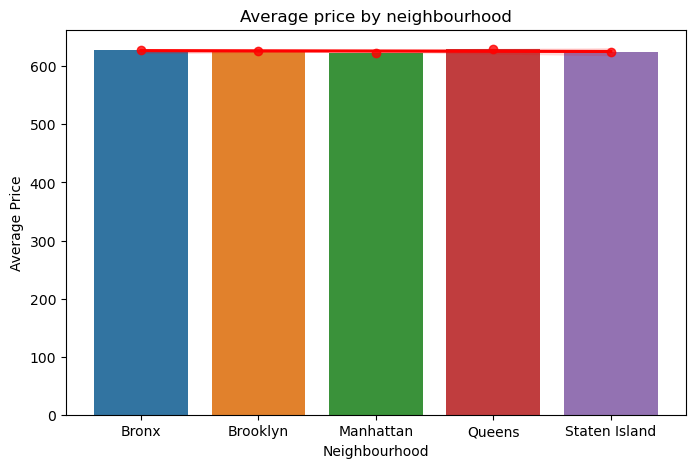

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#grouping the data by neighbourhood, group with value 'price'
df_groupby = df.groupby('neighbourhood group')['price'].mean().reset_index()



#creating a bar chart
plt.figure(figsize = (8, 5))
sns.barplot(x = 'neighbourhood group', y = 'price', data = df_groupby)

#trend line
sns.regplot(x = df_groupby.index, y = 'price', data = df_groupby, scatter = True, color = 'red')
#labels and title
plt.title('Average price by neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')

plt.show()


In [7]:
avg_price_by_neighbourhood = df.groupby('neighbourhood group')['price'].mean().reset_index()
avg_price_by_neighbourhood

,neighbourhood group,price
0,Bronx,628.000186
1,Brooklyn,626.275518
2,Manhattan,622.718067
3,Queens,630.256866
4,Staten Island,624.188889


<Axes: xlabel='neighbourhood group'>

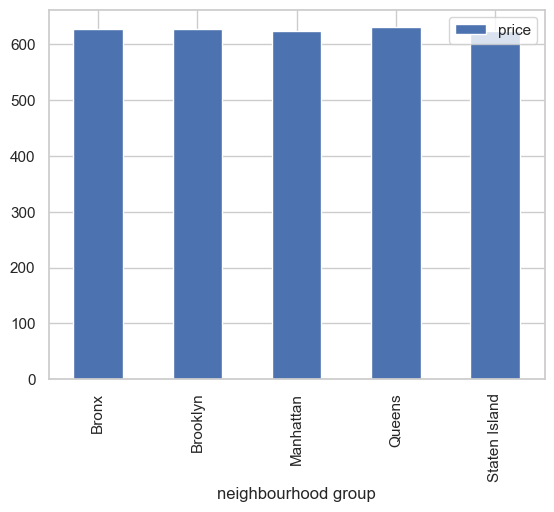

In [55]:
df_groupby.plot.bar( x = 'neighbourhood group', y = 'price')